<a href="https://colab.research.google.com/github/anubhavgupta1/Deep-Learning-Using-TensorFlow/blob/master/1_Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preprocessing**

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
!pip install tensorflow==1.10.0

     |████████████████████████████████| 58.4MB 81kB/s 
     |████████████████████████████████| 12.2MB 16.1MB/s 
     |████████████████████████████████| 3.3MB 46.4MB/s 
     |████████████████████████████████| 573kB 46.2MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: seaborn 0.11.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: pandas 1.1.4 has requirement num

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from functools import partial

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from matplotlib.colors import ListedColormap


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [4]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

#**Vanishing/Exploding Gradients Problem**

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def derivative_logit(z):
  return logit(z) * (1-logit(z))

In [7]:
def relu(z):
    return np.maximum(0, z)

In [8]:
z = np.linspace(-5, 5, 200)
z.shape

(200,)

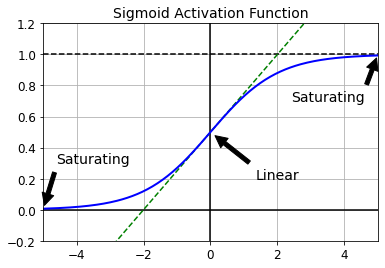

In [9]:
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid Activation Function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

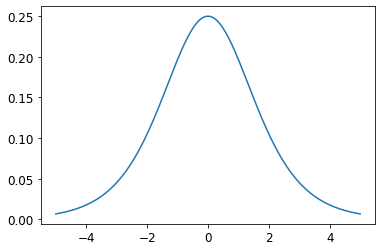

In [10]:
plt.plot(z, derivative_logit(z))

In [11]:
# Leaky ReLU plot

def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z, z)

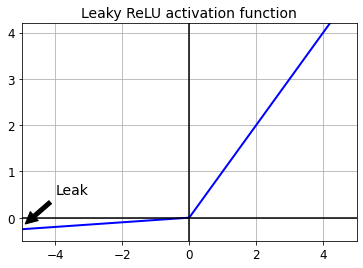

In [12]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2),
arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [13]:
def elu(z, alpha=1):
  return np.where(z < 0, alpha * (np.exp(z) - 1), z)

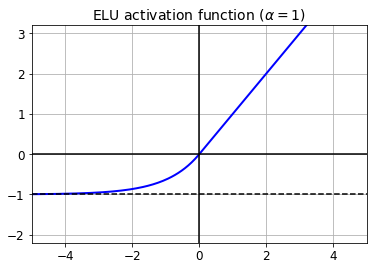

In [14]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [15]:
def selu(z,scale=1.0507009873554804934193349852946,alpha=1.6732632423543772848170429916717):
  return scale * elu(z, alpha)

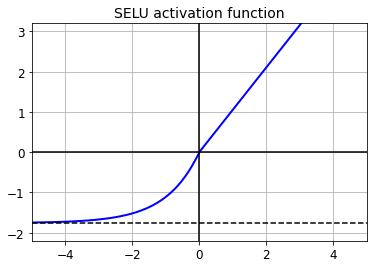

In [16]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [17]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(100):
  W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
  Z = selu(np.dot(Z, W))
  means = np.mean(Z, axis=1)
  stds = np.std(Z, axis=1)
  if layer % 10 == 0:
    print("Layer {}: {:.2f} < mean < {:.2f}, {:.2f} < std deviation < {:.2f}".format(layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 < std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 < std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 < std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 < std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 < std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 < std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 < std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 < std deviation < 1.20


In [18]:
mnist = input_data.read_data_sets("data/")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
n_inputs = 28*28  # MNIST
n_hidden1 = 100
n_hidden2 = 200
n_hidden3 = 300
n_outputs = 10

In [20]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

#**He Initilization**

In [21]:
he_init = tf.contrib.layers.variance_scaling_initializer()
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu,kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu,kernel_initializer=he_init)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",activation=tf.nn.relu,kernel_initializer=he_init)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

In [22]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [23]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [24]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [25]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [26]:
n_epochs = 40
batch_size = 50

In [27]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
    save_path = saver.save(sess, "model_ckps1/my_model_final.ckpt")

0 Train accuracy: 0.92 Val accuracy: 0.914
1 Train accuracy: 0.96 Val accuracy: 0.9366
2 Train accuracy: 0.96 Val accuracy: 0.9488
3 Train accuracy: 0.94 Val accuracy: 0.9556
4 Train accuracy: 0.94 Val accuracy: 0.9588
5 Train accuracy: 0.94 Val accuracy: 0.961
6 Train accuracy: 0.96 Val accuracy: 0.9636
7 Train accuracy: 0.96 Val accuracy: 0.963
8 Train accuracy: 0.96 Val accuracy: 0.9664
9 Train accuracy: 0.98 Val accuracy: 0.9666
10 Train accuracy: 1.0 Val accuracy: 0.9698
11 Train accuracy: 0.96 Val accuracy: 0.9716
12 Train accuracy: 1.0 Val accuracy: 0.9734
13 Train accuracy: 1.0 Val accuracy: 0.9684
14 Train accuracy: 1.0 Val accuracy: 0.9724
15 Train accuracy: 1.0 Val accuracy: 0.9742
16 Train accuracy: 1.0 Val accuracy: 0.9736
17 Train accuracy: 0.98 Val accuracy: 0.9746
18 Train accuracy: 1.0 Val accuracy: 0.9744
19 Train accuracy: 1.0 Val accuracy: 0.9742
20 Train accuracy: 1.0 Val accuracy: 0.9752
21 Train accuracy: 1.0 Val accuracy: 0.9742
22 Train accuracy: 1.0 Val accura

#**Activations**

##**Leaky Relu**

In [28]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [29]:
def leaky_relu(z, name=None):
  return tf.maximum(0.01 * z, z, name=name)

In [30]:
he_init = tf.contrib.layers.variance_scaling_initializer()

In [31]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=leaky_relu,kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=leaky_relu,kernel_initializer=he_init)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",activation=leaky_relu,kernel_initializer=he_init)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

In [32]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [33]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [34]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [35]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [36]:
n_epochs = 40
batch_size = 50

In [37]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
    save_path = saver.save(sess, "model_ckps2/my_model_final.ckpt")

0 Train accuracy: 0.88 Val accuracy: 0.9152
1 Train accuracy: 0.9 Val accuracy: 0.9314
2 Train accuracy: 0.96 Val accuracy: 0.942
3 Train accuracy: 0.96 Val accuracy: 0.9522
4 Train accuracy: 0.96 Val accuracy: 0.9572
5 Train accuracy: 1.0 Val accuracy: 0.9606
6 Train accuracy: 0.98 Val accuracy: 0.9628
7 Train accuracy: 1.0 Val accuracy: 0.9648
8 Train accuracy: 0.96 Val accuracy: 0.9682
9 Train accuracy: 0.96 Val accuracy: 0.9682
10 Train accuracy: 0.96 Val accuracy: 0.9714
11 Train accuracy: 0.96 Val accuracy: 0.9728
12 Train accuracy: 1.0 Val accuracy: 0.972
13 Train accuracy: 0.98 Val accuracy: 0.9732
14 Train accuracy: 1.0 Val accuracy: 0.9744
15 Train accuracy: 0.96 Val accuracy: 0.9732
16 Train accuracy: 0.92 Val accuracy: 0.9748
17 Train accuracy: 1.0 Val accuracy: 0.9752
18 Train accuracy: 1.0 Val accuracy: 0.974
19 Train accuracy: 1.0 Val accuracy: 0.9744
20 Train accuracy: 0.98 Val accuracy: 0.9738
21 Train accuracy: 1.0 Val accuracy: 0.9756
22 Train accuracy: 1.0 Val accur

##***ELU***

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [39]:
he_init = tf.contrib.layers.variance_scaling_initializer()

In [40]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.elu,kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.elu,kernel_initializer=he_init)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",activation=tf.nn.elu,kernel_initializer=he_init)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

In [41]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [42]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [43]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [44]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [45]:
n_epochs = 40
batch_size = 50

In [46]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
    save_path = saver.save(sess, "model_ckps3/my_model_final.ckpt")

0 Train accuracy: 0.88 Val accuracy: 0.9146
1 Train accuracy: 0.98 Val accuracy: 0.932
2 Train accuracy: 0.94 Val accuracy: 0.9446
3 Train accuracy: 0.96 Val accuracy: 0.9492
4 Train accuracy: 1.0 Val accuracy: 0.9532
5 Train accuracy: 0.98 Val accuracy: 0.959
6 Train accuracy: 0.96 Val accuracy: 0.9626
7 Train accuracy: 0.92 Val accuracy: 0.9658
8 Train accuracy: 1.0 Val accuracy: 0.9676
9 Train accuracy: 1.0 Val accuracy: 0.967
10 Train accuracy: 1.0 Val accuracy: 0.9696
11 Train accuracy: 0.96 Val accuracy: 0.969
12 Train accuracy: 0.98 Val accuracy: 0.9702
13 Train accuracy: 0.98 Val accuracy: 0.973
14 Train accuracy: 0.96 Val accuracy: 0.9714
15 Train accuracy: 0.98 Val accuracy: 0.9732
16 Train accuracy: 0.98 Val accuracy: 0.9734
17 Train accuracy: 1.0 Val accuracy: 0.9738
18 Train accuracy: 0.98 Val accuracy: 0.9756
19 Train accuracy: 1.0 Val accuracy: 0.9766
20 Train accuracy: 1.0 Val accuracy: 0.9746
21 Train accuracy: 1.0 Val accuracy: 0.9758
22 Train accuracy: 1.0 Val accura

##**SELU**

In [47]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [48]:
he_init = tf.contrib.layers.variance_scaling_initializer()

In [49]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.selu,kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.selu,kernel_initializer=he_init)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",activation=tf.nn.selu,kernel_initializer=he_init)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

In [50]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [51]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [52]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [53]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [54]:
n_epochs = 40
batch_size = 50

In [55]:
means = mnist.train.images.mean(axis=0, keepdims=True)
stds = mnist.train.images.std(axis=0, keepdims=True) + 1e-10
print(means.shape)
print(stds.shape)

(1, 784)
(1, 784)


In [56]:
training_errors = []
testing_erros = []
epochs = []
losses = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            training_op_result, loss_value = sess.run([training_op, loss], feed_dict={X: X_batch_scaled, y: y_batch})
            losses.append(loss_value)
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means) / stds
            acc_test = accuracy.eval(feed_dict={X: X_val_scaled, y: mnist.validation.labels})
            training_errors.append(acc_train)
            testing_erros.append(acc_test)
            epochs.append(epoch)
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

    save_path = saver.save(sess, "model_ckps4/my_model_final_selu.ckpt")

0 Batch accuracy: 0.92 Validation accuracy: 0.9334
5 Batch accuracy: 1.0 Validation accuracy: 0.9602
10 Batch accuracy: 1.0 Validation accuracy: 0.965
15 Batch accuracy: 1.0 Validation accuracy: 0.9676
20 Batch accuracy: 1.0 Validation accuracy: 0.968
25 Batch accuracy: 1.0 Validation accuracy: 0.9688
30 Batch accuracy: 1.0 Validation accuracy: 0.9688
35 Batch accuracy: 1.0 Validation accuracy: 0.9696


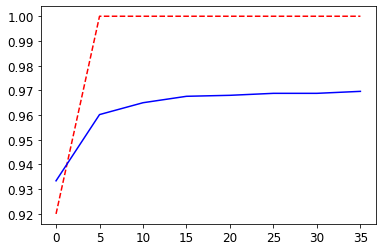

In [57]:
# red dashes, blue squares and green triangles
plt.plot(epochs, training_errors, 'r--', epochs, testing_erros, 'b-')
plt.show()

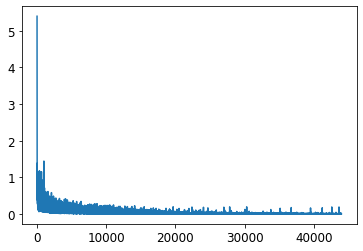

In [58]:
plt.plot(losses)

#**Batch Normalizaion**

##**1 Let's implement Batch Normalization with TensorFlow**

In [59]:
# Let's implement Batch Normalization with TensorFlow
reset_graph()
batch_norm_momentum = 0.9
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [60]:
# Set Training. Either a Python boolean, or a TensorFlow boolean scalar tensor (e.g. a placeholder)
# Whether to return the output in training mode (normalized with statistics of the current batch) 
# or in inference mode (normalized with moving statistics)

training = tf.placeholder_with_default(False, shape=(), name='training')

In [61]:
with tf.name_scope("dnn"):
  he_init = tf.contrib.layers.variance_scaling_initializer()
  
  hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",kernel_initializer=he_init)
  bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=batch_norm_momentum)
  bn1_act = tf.nn.selu(bn1)
  
  hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2",kernel_initializer=he_init)
  bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum = batch_norm_momentum)
  bn2_act = tf.nn.selu(bn2)
  
  hidden3 = tf.layers.dense(bn2_act, n_hidden3, name="hidden3",kernel_initializer=he_init)
  bn3 = tf.layers.batch_normalization(hidden3, training=training, momentum = batch_norm_momentum)
  bn3_act = tf.nn.selu(bn3)
  
  logits_before_bn = tf.layers.dense(bn3_act, n_outputs, name="outputs")
  logits = tf.layers.batch_normalization(logits_before_bn, training=training,momentum = batch_norm_momentum)

In [62]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [63]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [64]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [65]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [66]:
n_epochs = 100
batch_size = 200

In [67]:
# When is_training is True the moving_mean and moving_variance need to be updated by running these commands
# extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
# sess.run([train_op, extra_update_ops], ...)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "model_ckps5/my_model_final.ckpt")

0 Test accuracy: 0.8695
1 Test accuracy: 0.8901
2 Test accuracy: 0.904
3 Test accuracy: 0.9104
4 Test accuracy: 0.9192
5 Test accuracy: 0.9251
6 Test accuracy: 0.9319
7 Test accuracy: 0.9357
8 Test accuracy: 0.939
9 Test accuracy: 0.9427
10 Test accuracy: 0.9463
11 Test accuracy: 0.9481
12 Test accuracy: 0.9503
13 Test accuracy: 0.9531
14 Test accuracy: 0.9538
15 Test accuracy: 0.9553
16 Test accuracy: 0.9573
17 Test accuracy: 0.9584
18 Test accuracy: 0.9588
19 Test accuracy: 0.9603
20 Test accuracy: 0.9622
21 Test accuracy: 0.9634
22 Test accuracy: 0.9645
23 Test accuracy: 0.9647
24 Test accuracy: 0.966
25 Test accuracy: 0.9669
26 Test accuracy: 0.968
27 Test accuracy: 0.9673
28 Test accuracy: 0.9693
29 Test accuracy: 0.9687
30 Test accuracy: 0.9692
31 Test accuracy: 0.9707
32 Test accuracy: 0.9708
33 Test accuracy: 0.9705
34 Test accuracy: 0.9711
35 Test accuracy: 0.9714
36 Test accuracy: 0.9716
37 Test accuracy: 0.9724
38 Test accuracy: 0.9723
39 Test accuracy: 0.973
40 Test accurac

##**In previous example, we passed parameters repeatedly to batch_normalization function**
##**To avoid repeating the same parameters over and over again, we can use Python's partial() function** 
##**Let's improve previous example with partial( )**

In [68]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [69]:
# Set Training. Either a Python boolean, or a TensorFlow boolean scalar tensor (e.g. a placeholder)
# Whether to return the output in training mode (normalized with statistics of the current batch) 
# or in inference mode (normalized with moving statistics)

training = tf.placeholder_with_default(False, shape=(), name='training')
batch_norm_momentum = 0.9

In [70]:
with tf.name_scope("dnn"):
  he_init = tf.contrib.layers.variance_scaling_initializer()
  my_batch_norm_layer = partial(tf.layers.batch_normalization,training=training,momentum=batch_norm_momentum)
  my_dense_layer = partial(tf.layers.dense,kernel_initializer=he_init)
  
  hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
  bn1 = my_batch_norm_layer(hidden1)
  bn1_act = tf.nn.selu(bn1)
  
  hidden2 = my_dense_layer(bn1_act, n_hidden2, name="hidden2")
  bn2 = my_batch_norm_layer(hidden2)
  bn2_act = tf.nn.selu(bn2)
  
  hidden3 = my_dense_layer(bn2_act, n_hidden3, name="hidden3")
  bn3 = my_batch_norm_layer(hidden3)
  bn3_act = tf.nn.selu(bn3)
  
  logits_before_bn = my_dense_layer(bn3_act, n_outputs, name="outputs")
  logits = my_batch_norm_layer(logits_before_bn)

In [71]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [72]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [73]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [74]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [75]:
n_epochs = 100
batch_size = 200

In [76]:
# When is_training is True the moving_mean and moving_variance need to be updated by running these commands
# extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
# sess.run([train_op, extra_update_ops], ...)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "model_ckps6/my_model_final.ckpt")

0 Test accuracy: 0.8714
1 Test accuracy: 0.8968
2 Test accuracy: 0.9077
3 Test accuracy: 0.9182
4 Test accuracy: 0.9238
5 Test accuracy: 0.9299
6 Test accuracy: 0.9351
7 Test accuracy: 0.9384
8 Test accuracy: 0.9439
9 Test accuracy: 0.947
10 Test accuracy: 0.9494
11 Test accuracy: 0.9544
12 Test accuracy: 0.9549
13 Test accuracy: 0.9567
14 Test accuracy: 0.9583
15 Test accuracy: 0.9602
16 Test accuracy: 0.9621
17 Test accuracy: 0.9619
18 Test accuracy: 0.9638
19 Test accuracy: 0.9651
20 Test accuracy: 0.9644
21 Test accuracy: 0.965
22 Test accuracy: 0.9668
23 Test accuracy: 0.9666
24 Test accuracy: 0.9682
25 Test accuracy: 0.9679
26 Test accuracy: 0.9687
27 Test accuracy: 0.969
28 Test accuracy: 0.9686
29 Test accuracy: 0.9694
30 Test accuracy: 0.97
31 Test accuracy: 0.9707
32 Test accuracy: 0.9706
33 Test accuracy: 0.9713
34 Test accuracy: 0.9725
35 Test accuracy: 0.9725
36 Test accuracy: 0.9722
37 Test accuracy: 0.973
38 Test accuracy: 0.9737
39 Test accuracy: 0.9731
40 Test accuracy